In [210]:
import pandas as pd

In [211]:
data=pd.read_csv("Steel_industry_data.csv")

In [212]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [213]:
import matplotlib.pyplot as plt

In [214]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# plt.plot(data['date'], data['Usage_kWh'], linewidth=1)

# # Set labels and title
# plt.ylabel('Usage (kWh)')
# plt.xlabel('Date')
# plt.title('Energy Usage Over Time')

# # Add grid lines
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Tight layout
# plt.tight_layout()

# # Show the plot
# plt.show()



In [215]:
# plt.savefig('energy_usage.png', dpi=300)


# preporcessing

**set load type**

In [216]:
data["Load_Type"].value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

In [217]:
def setLoadTypes(type):
    if type=="Light_Load":
        return 1
    elif type=="Medium_Load":
        return 2
    else:
        return 3

data["Load_Type_tok"]=data["Load_Type"].apply(setLoadTypes)

In [218]:
data['Load_Type'].value_counts(),data["Load_Type_tok"].value_counts()

(Load_Type
 Light_Load      18072
 Medium_Load      9696
 Maximum_Load     7272
 Name: count, dtype: int64,
 Load_Type_tok
 1    18072
 2     9696
 3     7272
 Name: count, dtype: int64)

In [219]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Load_Type_tok
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1


**set week status**

In [220]:
encoded_data=pd.get_dummies(data, columns=["WeekStatus"])

In [221]:
encoded_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Monday,Light_Load,1,True,False
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Monday,Light_Load,1,True,False
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Monday,Light_Load,1,True,False
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Monday,Light_Load,1,True,False
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Monday,Light_Load,1,True,False


**drop load, week**

In [222]:
After_droped_data=encoded_data.drop(columns=["Day_of_week","Load_Type"])

In [223]:
After_droped_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,True,False
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,True,False
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,True,False
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,True,False
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,True,False


**data resampled to hour**

In [224]:
After_droped_data['date'] = pd.to_datetime(After_droped_data['date'], format="%d/%m/%Y %H:%M")
After_droped_data.set_index('date', inplace=True)

In [225]:
After_droped_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
date,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,1,True,False
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,True,False
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,True,False
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,True,False
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,True,False


In [226]:
data_resampled = After_droped_data.resample('1h').mean().reset_index()

In [227]:
data_resampled.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,2018-01-01 00:00:00,3.4575,3.5375,0.0,0.0,70.1400,100.0,1350.0,1.0,1.0,0.0
1,2018-01-01 01:00:00,3.5025,3.9400,0.0,0.0,66.5475,100.0,4950.0,1.0,1.0,0.0
2,2018-01-01 02:00:00,3.5300,4.1675,0.0,0.0,64.7400,100.0,8550.0,1.0,1.0,0.0
3,2018-01-01 03:00:00,3.4550,4.0500,0.0,0.0,65.0675,100.0,12150.0,1.0,1.0,0.0
4,2018-01-01 04:00:00,3.6175,4.4100,0.0,0.0,63.5175,100.0,15750.0,1.0,1.0,0.0


In [228]:
# plt.figure(figsize=(10,5))
# plt.plot(data_resampled['date'], data_resampled['Usage_kWh'], linewidth=1)

# # Set labels and title
# plt.ylabel('Usage (kWh)')
# plt.xlabel('Date')
# plt.title('Energy Usage Over Time after data resampled')

# # Add grid lines
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Tight layout
# plt.tight_layout()

# # Show the plot
# plt.show()

In [229]:
data_resampled.corr()["Usage_kWh"]

date                                   -0.120529
Usage_kWh                               1.000000
Lagging_Current_Reactive.Power_kVarh    0.902392
Leading_Current_Reactive_Power_kVarh   -0.300421
CO2(tCO2)                               0.992671
Lagging_Current_Power_Factor            0.437534
Leading_Current_Power_Factor            0.344542
NSM                                     0.249809
Load_Type_tok                           0.657181
WeekStatus_Weekday                      0.315201
WeekStatus_Weekend                     -0.315201
Name: Usage_kWh, dtype: float64

label encode load type

In [230]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
data_resampled['Load_Type_tok'] = encoder.fit_transform(data_resampled['Load_Type_tok'])

In [232]:
data_resampled.value_counts("Load_Type_tok")

Load_Type_tok
1.00    4215
2.00    1515
3.00    1117
2.75     701
2.25     606
1.75     303
1.25     208
1.50      95
Name: count, dtype: int64

normalize

In [233]:
from sklearn.preprocessing import StandardScaler 

In [234]:
scaler=StandardScaler()

In [235]:
sc_col=["Lagging_Current_Reactive.Power_kVarh","Leading_Current_Reactive_Power_kVarh","CO2(tCO2)","Lagging_Current_Power_Factor","Leading_Current_Power_Factor","NSM"]

In [236]:
data_resampled[sc_col]=scaler.fit_transform(data_resampled[sc_col])

In [237]:
data_resampled.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,2018-01-01 00:00:00,3.4575,-0.653948,-0.575268,-0.764626,-0.569356,0.55565,-1.661325,1.0,1.0,0.0
1,2018-01-01 01:00:00,3.5025,-0.626235,-0.575268,-0.764626,-0.765313,0.55565,-1.516862,1.0,1.0,0.0
2,2018-01-01 02:00:00,3.5300,-0.610571,-0.575268,-0.764626,-0.863906,0.55565,-1.372399,1.0,1.0,0.0
3,2018-01-01 03:00:00,3.4550,-0.618661,-0.575268,-0.764626,-0.846042,0.55565,-1.227936,1.0,1.0,0.0
4,2018-01-01 04:00:00,3.6175,-0.593874,-0.575268,-0.764626,-0.930588,0.55565,-1.083473,1.0,1.0,0.0


# get x, y

In [238]:
x=data_resampled.drop(columns=["date","Usage_kWh"])
y=data_resampled["Usage_kWh"]

In [239]:
x.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,-0.653948,-0.575268,-0.764626,-0.569356,0.55565,-1.661325,1.0,1.0,0.0
1,-0.626235,-0.575268,-0.764626,-0.765313,0.55565,-1.516862,1.0,1.0,0.0
2,-0.610571,-0.575268,-0.764626,-0.863906,0.55565,-1.372399,1.0,1.0,0.0
3,-0.618661,-0.575268,-0.764626,-0.846042,0.55565,-1.227936,1.0,1.0,0.0
4,-0.593874,-0.575268,-0.764626,-0.930588,0.55565,-1.083473,1.0,1.0,0.0


In [240]:
y.describe()

count    8760.000000
mean       27.386892
std        31.352647
min         2.465000
25%         3.247500
50%         4.742500
75%        50.960000
max       138.305000
Name: Usage_kWh, dtype: float64

In [241]:
y[0:5]

0    3.4575
1    3.5025
2    3.5300
3    3.4550
4    3.6175
Name: Usage_kWh, dtype: float64

creating windows

In [242]:
import numpy as np


In [243]:
def create_sliding_windows(x,y,window_size):
    x_win, y_win=[],[]
    for i in range(len(x)-window_size):
        window=x[i:(i+window_size)]
        usage=y[i+window_size]
        x_win.append(window)
        y_win.append(usage)
    return np.array(x_win), np.array(y_win)

In [244]:
window_sizes=[1,4,8,12,16]

final_data={}

for size in window_sizes:
    x_temp,y_temp= create_sliding_windows(x,y,size)
    final_data[f'win_{size}']=(x_temp, y_temp)


**data spliting**

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
train_test={}

In [247]:
for batch in final_data:
    print(len(final_data[batch][1]),"--",len(final_data[batch][0]))
    x_tr, x_te, y_tr, y_te=train_test_split(final_data[batch][0],final_data[batch][1],train_size=0.82, shuffle=False)
    print("-->", len(x_tr), "  ", len(x_te), "  ", len(y_tr), "  ", len(y_te))
    train_test[batch]={
        "x_train":x_tr,
        "x_test":x_te,
        "y_train":y_tr,
        "y_test":y_te
    }


8759 -- 8759
--> 7182    1577    7182    1577
8756 -- 8756
--> 7179    1577    7179    1577
8752 -- 8752
--> 7176    1576    7176    1576
8748 -- 8748
--> 7173    1575    7173    1575
8744 -- 8744
--> 7170    1574    7170    1574


> **Creating Models**

In [248]:
train_test['win_1']['x_train']

array([[[-0.65394772, -0.57526775, -0.7646259 , ...,  1.        ,
          1.        ,  0.        ]],

       [[-0.62623482, -0.57526775, -0.7646259 , ...,  1.        ,
          1.        ,  0.        ]],

       [[-0.610571  , -0.57526775, -0.7646259 , ...,  1.        ,
          1.        ,  0.        ]],

       ...,

       [[-0.47062943, -0.57526775, -0.7646259 , ...,  1.        ,
          0.        ,  1.        ]],

       [[-0.47975231, -0.57526775, -0.7646259 , ...,  1.        ,
          0.        ,  1.        ]],

       [[-0.48130148, -0.57526775, -0.7646259 , ...,  1.        ,
          0.        ,  1.        ]]])

In [249]:
train_test['win_1']['y_train']

array([3.5025, 3.53  , 3.455 , ..., 3.1425, 3.315 , 3.33  ])

In [250]:
train_test['win_1']['x_train'].shape

(7182, 1, 9)

In [251]:
train_test['win_1']['x_train'].shape[1],train_test['win_1']['x_train'].shape[2]

(1, 9)

# model creating and training

In [252]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [253]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

# single_LSTM.compile(optimizer='adam', loss=rmse)

single layer

In [254]:
single_LSTM_models = {}

for batch in train_test:
    print(batch)
    x_train=train_test[batch]["x_train"]
    y_train=train_test[batch]["y_train"]
    x_test=train_test[batch]["x_test"]
    y_test=train_test[batch]["y_test"]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss=rmse, metrics=['mse'])
    
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    single_LSTM_models[batch]=model

win_1


Epoch 1/5


c:\Users\dinit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dinit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 38.5923 - mse: 1546.0619 - val_loss: 28.4934 - val_mse: 874.6532
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 31.8457 - mse: 1026.9302 - val_loss: 28.5954 - val_mse: 877.3841
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31.5136 - mse: 1010.8120 - val_loss: 28.7437 - val_mse: 877.9778
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31.5662 - mse: 1009.9387 - val_loss: 28.8557 - val_mse: 881.0201
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 31.7230 - mse: 1021.0999 - val_loss: 28.7710 - val_mse: 879.5571
win_4
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 37.3085 - mse: 1430.3318 - val_loss: 28.7312 - val_mse: 884.7103
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 31.6769 - mse: 1020.4117 - val_loss: 28.6286 - val_mse: 879.2092
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 31.4627 - mse: 1003.0781 - val_loss: 28.4222 - val_mse: 876.3817
Epoch 4/5
22

double layer

In [255]:
double_LSTM_models = {}

for batch in train_test:
    print(batch)
    x_train=train_test[batch]["x_train"]
    y_train=train_test[batch]["y_train"]
    x_test=train_test[batch]["x_test"]
    y_test=train_test[batch]["y_test"]
    
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.LSTM(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss=rmse, metrics=['mse'])
    
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    double_LSTM_models[batch]=(model, history)

win_1
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 36.8855 - mse: 1440.7833 - val_loss: 17.9438 - val_mse: 382.2810
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19.0903 - mse: 375.1525 - val_loss: 16.7866 - val_mse: 333.2388
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 18.5785 - mse: 357.1852 - val_loss: 15.8733 - val_mse: 299.0649
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17.1983 - mse: 307.5255 - val_loss: 15.0216 - val_mse: 269.6679
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16.4410 - mse: 280.9796 - val_loss: 14.5988 - val_mse: 255.3633
win_4
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 31.8826 - mse: 1093.9141 - val_loss: 16.1998 - val_mse: 306.6620
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15.9330 - mse: 264.0616 - val_loss: 12.6930 - val_mse: 194.6610
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 14.4375 - mse: 218.4289 - val_loss: 12.0192 - val_mse: 175.7654
E

Bidirectional layer

In [256]:
from keras.layers import Bidirectional

In [257]:
from tensorflow.keras.layers import LSTM

bidirectional_LSTM_models = {}

for batch in train_test:
    print(batch)
    x_train=train_test[batch]["x_train"]
    y_train=train_test[batch]["y_train"]
    x_test=train_test[batch]["x_test"]
    y_test=train_test[batch]["y_test"]

    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(LSTM(64 , activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.LSTM(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # model.compile(optimizer='adam', loss=rmse, metrics=['mse'])
    
    # history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # bidirectional_LSTM_models[batch]=(model, history)
    


win_1


c:\Users\dinit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "lstm_88" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)

In [ ]:
y_t=train_test['win_4']['y_train'].reshape(-1,1)

In [ ]:
y_t.shape

(7179, 1)

In [ ]:
y_t

array([[3.6175],
       [3.4275],
       [3.565 ],
       ...,
       [3.1425],
       [3.315 ],
       [3.33  ]])

In [ ]:
train_test['win_4']['x_train'].shape

(7179, 4, 9)

In [ ]:
single_LSTM.fit(train_test['win_4']['x_tr'
'ain'], y_t, epochs=50)

NameError: name 'single_LSTM' is not defined

In [ ]:
loss = single_LSTM.evaluate(train_test['win_1']['x_test'],train_test['win_1']['y_test'])
print(f"Test Loss: {loss}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.3508 - mse: 746.8795 
Test Loss: [22.721452713012695, 644.0781860351562]


In [ ]:
train_test['win_1']['x_test']

array([[[-0.44257226, -0.57526775, -0.7646259 , ...,  0.        ,
          0.        ,  1.        ]],

       [[-0.46735896, -0.57526775, -0.7646259 , ...,  0.        ,
          0.        ,  1.        ]],

       [[ 1.12002255, -0.57526775,  0.06473975, ...,  0.        ,
          0.        ,  1.        ]],

       ...,

       [[-0.89751146,  1.91137534, -0.7646259 , ...,  0.        ,
          1.        ,  0.        ]],

       [[-0.89751146,  1.41129741, -0.7646259 , ...,  0.        ,
          1.        ,  0.        ]],

       [[-0.6849311 , -0.08150581, -0.7646259 , ...,  0.        ,
          1.        ,  0.        ]]])

In [ ]:
pre=single_LSTM.predict(train_test['win_1']['x_test'])

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
pre

array([[ 0.4613157],
       [ 0.7152523],
       [17.252071 ],
       ...,
       [-0.5824857],
       [-1.302568 ],
       [-2.1012185]], dtype=float32)

In [ ]:
train_test['win_1']['y_test']

array([ 3.1675, 31.9225, 45.4575, ...,  3.4375,  3.5375,  3.7875])

In [ ]:
i=range(0,len(train_test['win_1']['y_test']))

In [ ]:
len(pre)

1577

In [ ]:
len(train_test['win_1']['y_test'])

1577

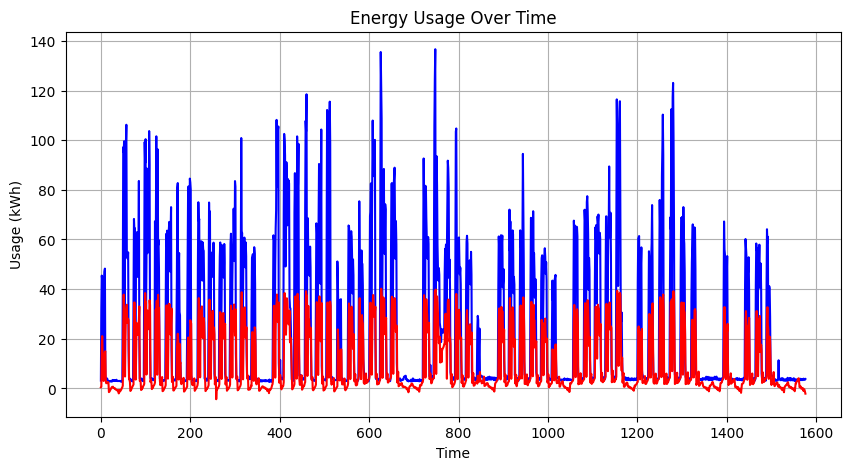

In [ ]:
import matplotlib.pyplot as plt

# Plot a line graph (example: Usage_kWh over time)
plt.figure(figsize=(10, 5))
plt.plot(i, train_test['win_1']['y_test'], label='Actual Usage', color='blue')
plt.plot(i, pre, label='Predicted Usage', color='red')
plt.xlabel("Time")
plt.ylabel("Usage (kWh)")
plt.title("Energy Usage Over Time")
plt.grid(True)
plt.show()